In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

file_to_load = "Resources/Datafiniti_Fast_Food_Restaurants.csv"
file_to_load2 = "Resources/crime_data_w_population_and_crime_rate.csv"


fastfood_data = pd.read_csv(file_to_load)
ff_counts = fastfood_data['province'].value_counts()
ff_bystate = pd.DataFrame(ff_counts)
ff_bystate = ff_bystate.reset_index(inplace=False)
ff_bystate = ff_bystate.rename(columns={"index":"state"})
ff_bystate = ff_bystate.rename(columns={"province":"number"})

In [93]:
crime_data = pd.read_csv(file_to_load2)
crime_data[['county','state']] = crime_data['county_name'].str.split(', ',expand=True)
crime_data["crime_rate"] = crime_data['crime_rate_per_100000']/1000
crime_data = crime_data[['state','crime_rate']]
crime_bystate = crime_data.groupby(['state'])
avg_bystate = crime_bystate.mean()
avg_bystate["crime_rate"] = avg_bystate["crime_rate"]
avg_bystate = avg_bystate.drop(avg_bystate.index[7])

In [81]:
combined_df = pd.merge(ff_bystate, avg_bystate, on='state', how='inner')

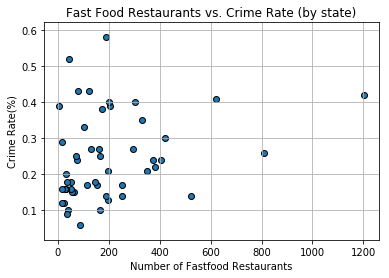

In [103]:
plt.scatter(combined_df["number"],combined_df["crime_rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by state)")
plt.ylabel("Crime Rate(%)")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by state).png")

plt.show()

In [124]:
file_to_load3 = "Clean_data/cleaned_fastFood.csv"
file_to_load4 = "Clean_data/cleaned_crime_rate.csv"

fastfood_data2 = pd.read_csv(file_to_load3)
fastfood_data2["county/state"] = fastfood_data2.county.str.cat(fastfood_data2.state, sep=", ")
ff_bycounty = fastfood_data2.groupby(['county/state'])
ff_bycounty = ff_bycounty[['number_of_fastfood']]
ff_bycounty = ff_bycounty.sum()

In [101]:
crime_data2 = pd.read_csv(file_to_load4)
crime_data2["county/state"] = crime_data2.county.str.cat(crime_data2.state, sep=", ")
crime_data2["crime rate"] = crime_data2['crime rate/100000']/1000
crime_bycounty = crime_data2.groupby(['county/state'])
crime_bycounty = crime_bycounty[['crime rate']]
crime_bycounty = crime_bycounty.mean()
combined_df2 = pd.merge(ff_bycounty, crime_bycounty, on='county/state', how='inner')

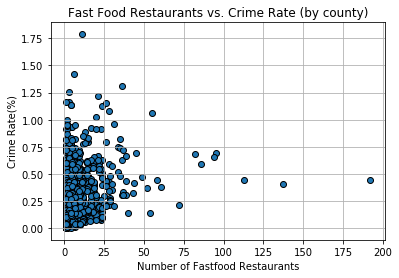

In [104]:
plt.scatter(combined_df2["number_of_fastfood"], combined_df2["crime rate"], edgecolor="black", marker="o")

plt.title("Fast Food Restaurants vs. Crime Rate (by county)")
plt.ylabel("Crime Rate(%)")
plt.xlabel("Number of Fastfood Restaurants")
plt.grid(True)
plt.savefig("Fast Food Restaurants vs. Crime Rate (by county).png")

plt.show()

In [126]:
combined_sort = combined_df2.loc[combined_df2["crime rate"] < 0.05, :]
combined_sort = combined_sort.reset_index(inplace=False)
combined_sort[['county','state']] = combined_sort['county/state'].str.split(',',expand=True)
combined_sort.sort_values('state', ascending=True)

,county/state,number_of_fastfood,crime rate,county,state
73,"Randolph County, AR",1,0.028261,Randolph County,AR
82,"Tolland County, CT",5,0.035673,Tolland County,CT
19,"Chattahoochee County, GA",1,0.000000,Chattahoochee County,GA
24,"Dawson County, GA",3,0.048488,Dawson County,GA
23,"Crawford County, IA",1,0.040151,Crawford County,IA
20,"Clay County, IA",3,0.036383,Clay County,IA
95,"Winneshiek County, IA",2,0.028580,Winneshiek County,IA
25,"Dickinson County, IA",2,0.041286,Dickinson County,IA
17,"Carroll County, IA",7,0.038839,Carroll County,IA
15,"Buchanan County, IA",2,0.038139,Buchanan County,IA
